In [16]:
import scipy.sparse as sp
import numpy as np
import matplotlib.pyplot as plt
import time


In [63]:
A_dense= np.array([[0,1,0,0],[0,0,0,2],[0,0,3,0],[4,0,0,0]])
print("A_dense:\n", A_dense)
values=[1,2,3,4] # aqui se colocan los valores no nulos en la matriz densa
rows=[0,1,2,3] # la posicion de fila del valor no nulo todos los indices i
cols=[1,3,2,0] # la posicion de la columna del valor no nulo todos los indices j
A_sparse= sp.coo_matrix((values,(rows,cols)),shape=[4,4])# se usa el formato de almacenamiento COO
#print("A_sparse:\n",A_sparse)
A_csr=A_sparse.tocsr() # usando el formato de almacenmiento CSR
print("A_csr", A_csr)
print(A_csr.data)# coloca en el vector todos los valores no nulos [1,2,3,4]
print(A_csr.indices)# coloca los indices de las columnas donde estan los valores no nulos [1,3,2,0]
print(A_csr.indptr)# aqui recorre por filas y va sumando cuantos elementos nulos hay por fila,simepre empieza en cero [0,1,2,3,4]

data=[1,3,2,5,6]
icndices=[2,1,3,2,4]
indptr=[0,2,4,5]
B_csr=sp.csr_array((data,icndices,indptr),shape=[3,5])
print("B_csr:\n", B_csr)
print(B_csr.toarray()) #me imprime como arreglo
B_csr.nnz #me da el numero de entradas no nulas nnz es un atributo



A_dense:
 [[0 1 0 0]
 [0 0 0 2]
 [0 0 3 0]
 [4 0 0 0]]
A_csr <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (4, 4)>
  Coords	Values
  (0, 1)	1
  (1, 3)	2
  (2, 2)	3
  (3, 0)	4
[1 2 3 4]
[1 3 2 0]
[0 1 2 3 4]
B_csr:
 <Compressed Sparse Row sparse array of dtype 'int64'
	with 5 stored elements and shape (3, 5)>
  Coords	Values
  (0, 2)	1
  (0, 1)	3
  (1, 3)	2
  (1, 2)	5
  (2, 4)	6
[[0 3 1 0 0]
 [0 0 5 2 0]
 [0 0 0 0 6]]


5

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


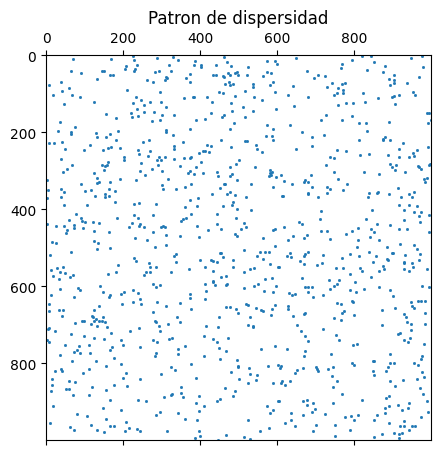

In [62]:
nrows=1000
ncols=1000
A=sp.random(nrows,ncols,density=0.001, format='csr', data_rvs=np.random.randn)
print(A.toarray())
plt.figure(figsize=(5,5))
plt.spy(A, markersize=1)
plt.title("Patron de dispersidad")
plt.show()


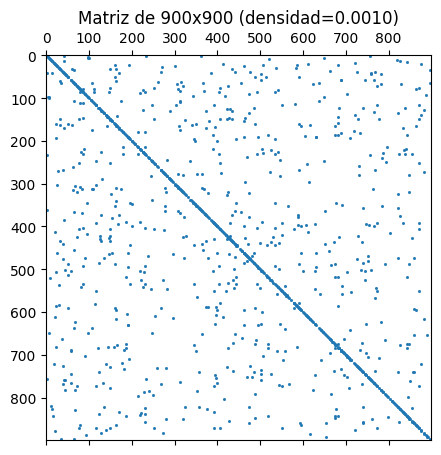

Error con sp.solve : 5.954555415306588e-12
Error con np.solve : 1.6818185922572052e-13
tiempo con scipy         tiempo con numpy         
--------------------------------------------------
        5.027000e-04        2.031650e-02


In [ ]:
nrows=900
ncols=900
A=sp.random(nrows,ncols,density=0.001, format='csr', data_rvs=np.random.randn)
C=A.T*A # matriz simetrica
#print(A.toarray())
plt.figure(figsize=(5,5))
plt.spy(C, markersize=1)
plt.title(f"Matriz de {nrows}x{ncols} (densidad={A.nnz/(nrows*ncols):.4f})")
plt.show()

x=np.ones((nrows,1))
alpha = 1e-2
A = A.T @ A + alpha * sp.eye(nrows, format='csr') # arreglando para que A no sea singular y pueda funcionar el metod spsolve
b=A*x
sol_sp= sp.linalg.spsolve(A,b)
print("Error con sp.solve :",np.linalg.norm(x-sol_sp,2))

A_dense=A.todense()
sol_dense=np.linalg.solve(A_dense,b)
print("Error con np.solve :", np.linalg.norm(x-sol_dense,2))

start_time1=time.perf_counter() #para ver cuanto tiempo se toma en hacer los calculos
xx= sp.linalg.spsolve(A,b)
end_time1= time.perf_counter()
elapsed_time1=end_time1-start_time1

start_time2=time.perf_counter() #para ver cuanto tiempo se toma en hacer los calculos
sol_dense1=np.linalg.solve(A_dense,b)
end_time2= time.perf_counter()
elapsed_time2=end_time2-start_time2
print('{:25s}{:25s}'.format("tiempo con scipy","tiempo con numpy"))
print("-"*50)
print('{:20e}{:20e}'.format(elapsed_time1,elapsed_time2))
